In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
df = df.drop(columns=["Timestamp"])
df.columns = [
    "Gender", "Age", "Course", "Year", "CGPA", "MaritalStatus",
    "Depression", "Anxiety", "PanicAttack", "SoughtTreatment"
]
for col in ["Depression", "Anxiety", "PanicAttack", "SoughtTreatment", "MaritalStatus", "Gender"]:
    df[col] = df[col].astype(str).str.strip().str.title()
df.head()

,Gender,Age,Course,Year,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SoughtTreatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


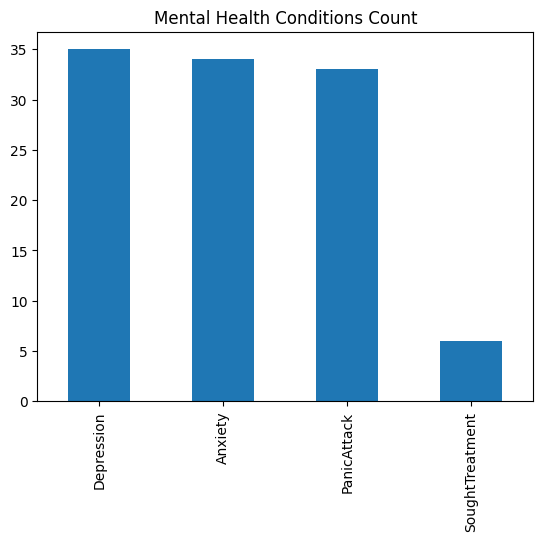

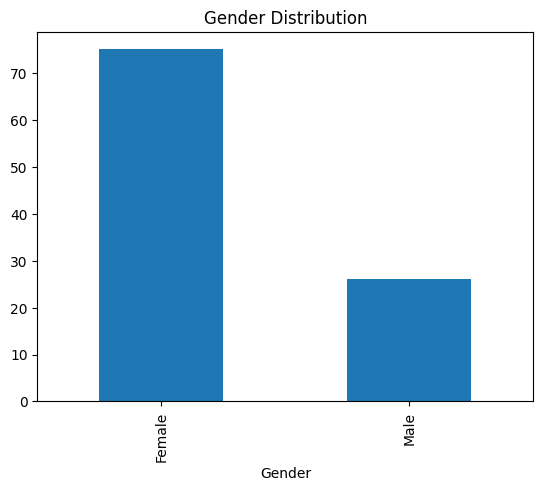

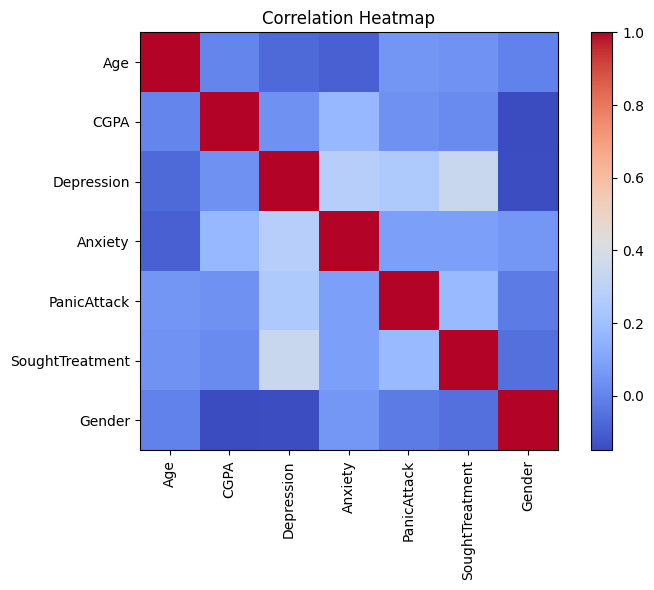

In [7]:
# Plot conditions
counts = df[["Depression","Anxiety","PanicAttack","SoughtTreatment"]].apply(lambda s: s.value_counts()).T
counts["Yes"].plot(kind="bar")
plt.title("Mental Health Conditions Count")
plt.show()

# Gender distribution
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

# Heatmap correlations (only numeric columns)

df_corr = df.copy()

# Convert Yes/No and Gender to numeric
binary_map = {
    "Yes": 1, "No": 0,
    "Female": 0, "Male": 1
}

for col in ["Depression", "Anxiety", "PanicAttack", "SoughtTreatment", "MaritalStatus", "Gender"]:
    df_corr[col] = df_corr[col].map(binary_map)

# Convert CGPA ranges to numeric midpoints
def cgpa_to_num(x):
    try:
        low, high = x.split("-")
        return (float(low) + float(high)) / 2
    except:
        return np.nan

df_corr["CGPA"] = df_corr["CGPA"].apply(cgpa_to_num)

# Keep only numeric columns for correlation
numeric_df = df_corr[["Age", "CGPA", "Depression", "Anxiety", "PanicAttack", "SoughtTreatment", "Gender"]]

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation="nearest", cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()